<a href="https://colab.research.google.com/github/Jaguar838/ml-zoomcamp/blob/master/HW/hw-01/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework #1

### Set up the environment

You need to install Python, NumPy, Pandas, Matplotlib and Seaborn. For that, you can the instructions from <a href='https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/01-intro/06-environment.md'>06-environment.md</a>.

In [17]:
import numpy as np
import pandas as pd

### Question 1

What's the version of Pandas that you installed?

You can get the version information using the `__version__` field:

In [18]:
pd.__version__

'2.2.2'

### Getting the data


For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

Or just open it with your browser and click "Save as...".

Now read it with Pandas.

In [19]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
data = pd.read_csv(url)

In [20]:
data.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [21]:
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Q2. Records count

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB




How many records are in the dataset?

- **9704**


### Q3. Fuel types

In [23]:
data.nunique()

,0
engine_displacement,36
num_cylinders,14
horsepower,192
vehicle_weight,9704
acceleration,162
model_year,24
origin,3
fuel_type,2
drivetrain,2
num_doors,9




How many fuel types are presented in the dataset?
- *2*


In [24]:
data.isna().sum()

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


### Q4. Missing values



How many columns in the dataset have missing values?

- **4**

In [25]:
# Рахуємо кількість стовпців з пропущеними значеннями
num_cols_with_missing = data.isnull().any().sum()

print(f"\nКількість стовпців з пропущеними значеннями: {num_cols_with_missing}")
# Кількість стовпців з пропущеними значеннями: 4


Кількість стовпців з пропущеними значеннями: 4


### Q5. Max fuel efficiency



What's the maximum fuel efficiency of cars from Asia?


- **23.75**

In [26]:
data.groupby('origin')['fuel_efficiency_mpg'].agg(['min', 'mean', 'max'])

,min,mean,max
origin,,,
Asia,6.886245,14.973830,23.759123
Europe,6.200971,14.942532,25.967222
USA,6.695483,15.040204,24.971452


### Q6. Медіанне значення кінських сил

Це завдання складається з кількох кроків і перевіряє, як заповнення пропущених значень впливає на медіану.

**Кроки для виконання:**

1.  **Знайдіть медіану:** Обчисліть медіанне значення для стовпця `horsepower` у початковому датасеті (з усіма пропусками).
2.  **Знайдіть найчастіше значення:** Тепер для того ж стовпця `horsepower` знайдіть значення, яке зустрічається найчастіше (це називається "мода" розподілу).
3.  **Заповніть пропуски:** Використовуйте метод `.fillna()`, щоб заповнити всі пропущені значення (`NaN`) у стовпці `horsepower` тим значенням, яке ви знайшли у попередньому кроці (тобто найчастішим).
4.  **Обчисліть медіану знову:** Після того, як ви заповнили пропуски, ще раз розрахуйте медіанне значення для оновленого стовпця `horsepower`.
5.  **Порівняйте результати:** Дайте відповідь на питання: "Чи змінилося медіанне значення після заповнення пропусків?". Варіанти відповіді:

    *   Yes, it increased
    *   Yes, it decreased
    *   Ні, не змінилося.

In [27]:
data['horsepower'].isna().sum()

np.int64(708)

In [28]:
median_before = data['horsepower'].median()
median_before

149.0

In [29]:
mode_horsepower = data['horsepower'].mode()[0]
mode_horsepower


np.float64(152.0)

In [30]:
data['horsepower'] = data['horsepower'].fillna(mode_horsepower)

median_after = data['horsepower'].median()

In [31]:
data['horsepower'].isna().sum()

np.int64(0)

Q6: Yes, it increased

### Visualization results

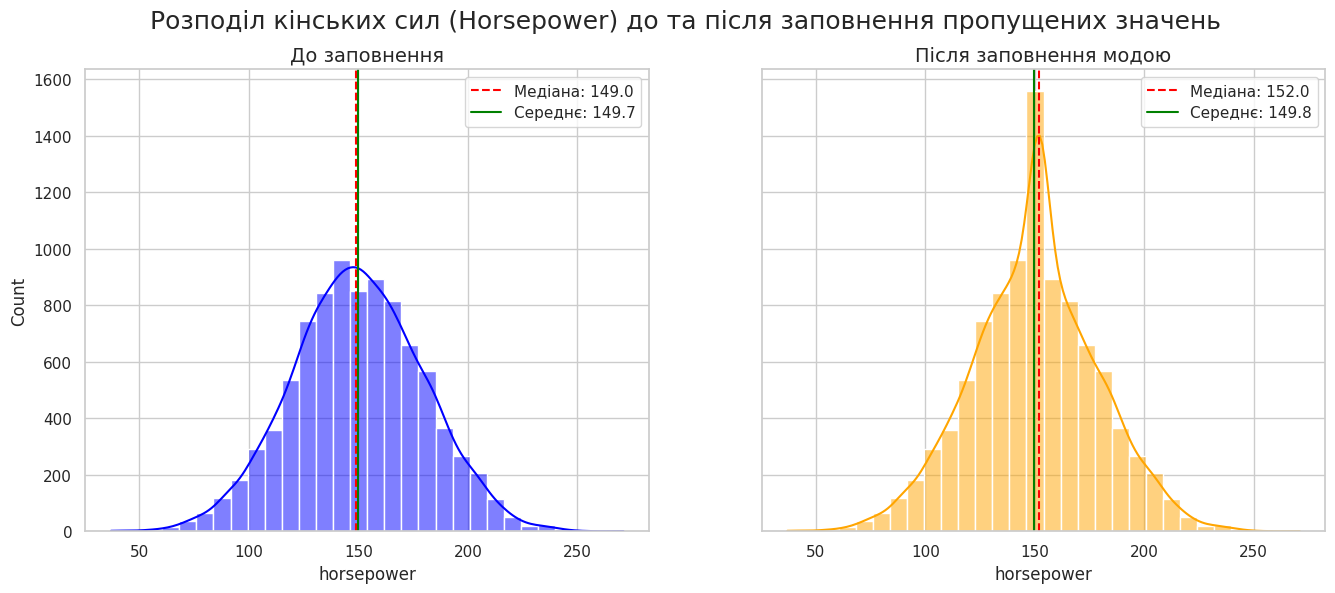

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Щоб отримати початковий стовпець 'horsepower' з NaN, нам потрібно перезавантажити дані
data_original = pd.read_csv(url)

# Створюємо фігуру з двома підграфіками
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Розподіл кінських сил (Horsepower) до та після заповнення пропущених значень', fontsize=18)

# Графік 1: До заповнення NaN
sns.histplot(data_original['horsepower'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('До заповнення', fontsize=14)
axes[0].axvline(median_before, color='red', linestyle='--', label=f'Медіана: {median_before:.1f}')
axes[0].axvline(data_original['horsepower'].mean(), color='green', linestyle='-', label=f'Середнє: {data_original["horsepower"].mean():.1f}')
axes[0].legend()


# Графік 2: Після заповнення NaN
# DataFrame 'data' вже містить заповнені значення
sns.histplot(data['horsepower'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Після заповнення модою', fontsize=14)
axes[1].axvline(median_after, color='red', linestyle='--', label=f'Медіана: {median_after:.1f}')
axes[1].axvline(data['horsepower'].mean(), color='green', linestyle='-', label=f'Середнє: {data["horsepower"].mean():.1f}')
axes[1].legend()

plt.show()

### Теоретична довідка до Q6: Медіана та Мода

#### Медіана (Median)

**Медіана — це значення, яке знаходиться рівно посередині відсортованого набору даних.** Вона ділить дані на дві рівні частини: 50% значень менші за медіану, а 50% — більші.

**Як її знайти:**

1.  **Відсортуйте** всі значення від найменшого до найбільшого.
2.  **Знайдіть центральне значення:**
    *   Якщо кількість значень **непарна**, медіана — це число, що стоїть точно посередині.
    *   Якщо кількість значень **парна**, медіана — це середнє арифметичне двох центральних чисел.

**Головна перевага медіани:** на неї слабко впливають екстремально великі або малі значення (так звані "викиди").

У pandas медіану можна розрахувати методом `.median()`.

#### Мода (Mode)

**Мода — це значення, яке зустрічається в наборі даних найчастіше.**

**Як її знайти:**

Просто порахуйте, скільки разів з'являється кожне унікальне значення. Те, у якого найбільша частота, і є модою.

**Особливості моди:**

*   Набір даних може мати одну моду, декілька мод або не мати її взагалі.
*   Мода особливо корисна для категоріальних даних, але також використовується і для числових.

У pandas моду можна знайти методом `.mode()`. Він повертає `Series`, оскільки мод може бути декілька.

#### Підсумок

*   **Медіана** — це про **середину** відсортованого набору.
*   **Мода** — це про **найпопулярніше** або найчастіше значення.

У завданні Q6 ви спершу знаходите медіану "як є", а потім заповнюєте пропуски найпопулярнішим значенням (модою) і дивитеся, як це вплинуло на "середину" (медіану) оновленого набору даних.

### Q7. Sum of weights



1. Select all the cars from Asia
2. Select only columns `vehicle_weight` and `model_year`
3. Select the first 7 values
4. Get the underlying NumPy array. Let's call it `X`.
5. Compute matrix-matrix multiplication between the transpose of `X` and `X`. To get the transpose, use `X.T`. Let's call the result `XTX`.
6. Invert `XTX`.
7. Create an array `y` with values `[1100, 1300, 800, 900, 1000, 1100, 1200]`.
8. Multiply the inverse of `XTX` with the transpose of `X`, and then multiply the result by `y`. Call the result `w`.
9. What's the sum of all the elements of the result?

> **Note**: You just implemented linear regression. We'll talk about it in the next lesson.


- 5.1


In [33]:
asia_df = data[data.origin == 'Asia']
asia_df = asia_df[['vehicle_weight', 'model_year']]
asia_df[0:7]

,vehicle_weight,model_year
8,2714.219310,2016
12,2783.868974,2010
14,3582.687368,2007
20,2231.808142,2011
21,2659.431451,2016
34,2844.227534,2014
38,3761.994038,2019


In [34]:
X = asia_df[:7].values
XTX = X.T.dot(X)

XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 5.71497081e-07, -8.34509443e-07],
       [-8.34509443e-07,  1.25380877e-06]])

In [35]:
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])

In [36]:
w = (XTX_inv @ X.T) @ y

In [37]:
w

array([0.01386421, 0.5049067 ])

In [40]:
w.sum().round(3)

np.float64(0.519)

> **Note**: we just implemented normal equation


$$w = (X^T X)^{-1} X^T y$$


We'll talk about it more in the next week (Machine Learning for Regression)

### Теоретична довідка до Q7: Лінійна регресія та нормальне рівняння

#### Що таке лінійна регресія? (Простими словами)

Уявіть, що у вас є набір точок на графіку. Наприклад, по осі X — вага автомобіля, а по осі Y — його ціна. Ви помічаєте, що загалом, чим важчий автомобіль, тим він дорожчий.

**Лінійна регресія — це спроба провести пряму лінію через ці точки так, щоб вона найкраще описувала цей зв'язок.**

Ця "найкраща" лінія дозволяє нам робити прогнози. Наприклад, якщо ми дізнаємося вагу нового автомобіля, ми зможемо за допомогою нашої лінії приблизно передбачити його ціну.

#### Як це пов'язано із завданням Q7?

У завданні Q7 ви вручну реалізуєте один із класичних методів розв'язання лінійної регресії, який називається **"Нормальне рівняння" (Normal Equation)**.

Це математична формула, яка дозволяє знайти оптимальні ваги `w` **за один крок**, без ітерацій чи поступового "навчання".

Формула виглядає так:

`w = (XᵀX)⁻¹ Xᵀy`

А тепер давайте розберемо кроки з вашого завдання і порівняємо їх із цією формулою:

1.  **`Select all the cars from Asia... Get the underlying NumPy array. Let's call it X.`**
    *   Це ви готуєте матрицю ознак `X`.

2.  **`Compute matrix-matrix multiplication between the transpose of X and X. ... Let's call the result XTX.`**
    *   Це ви обчислюєте `XᵀX` (у коді `X.T @ X`).

3.  **`Invert XTX.`**
    *   Це ви знаходите обернену матрицю `(XᵀX)⁻¹`.

4.  **`Create an array y ...`**
    *   Це ви визначаєте вектор цільових значень `y`.

5.  **`Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.`**
    *   Це і є фінальний розрахунок за формулою: `(XᵀX)⁻¹` помножити на `Xᵀ` і помножити на `y`. Результат — це і є ваші ваги `w`.

Отже, виконуючи кроки із Q7, ви, по суті, розв'язуєте рівняння лінійної регресії, щоб знайти коефіцієнти (ваги `w`), які найкращим чином пов'язують вагу та рік випуску автомобіля (`X`) з деякими цільовими значеннями (`y`).